In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import subprocess
import librosa
import numpy as np
import json

# Directories containing the audio files
audio_input_dir = "/kaggle/input/extracted-audio/extracted_audio"  # Update this path to where your audio files are located
audio_output_dir = "/kaggle/working/mono_audio"  # Output directory for mono audio files

# Ensure the output directory exists
os.makedirs(audio_output_dir, exist_ok=True)

def convert_to_mono(audio_dir, output_dir):
    for audio_file in os.listdir(audio_dir):
        if audio_file.endswith('.wav'):
            audio_path = os.path.join(audio_dir, audio_file)
            mono_audio_path = os.path.join(output_dir, 'mono_' + audio_file)
            
            # Convert to mono audio with a sample rate of 16000 Hz
            subprocess.run(['ffmpeg', '-i', audio_path, '-ac', '1', '-ar', '16000', mono_audio_path])

def audio_analysis(audio_dir):
    analysis_results = []
    for audio_file in os.listdir(audio_dir):
        if audio_file.startswith('mono_') and audio_file.endswith('.wav'):
            audio_path = os.path.join(audio_dir, audio_file)
            
            # Load audio file
            y, sr = librosa.load(audio_path, sr=16000)
            
            # Extract features (example: MFCCs)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfccs_mean = np.mean(mfccs, axis=1).tolist()
            mfccs_std = np.std(mfccs, axis=1).tolist()
            
            # Store the results
            analysis_results.append({
                'file': audio_file,
                'mfccs_mean': mfccs_mean,
                'mfccs_std': mfccs_std
            })
    
    # Save the analysis results to a JSON file
    with open(os.path.join(audio_dir, 'analysis_results.json'), 'w') as f:
        json.dump(analysis_results, f, indent=4)

# Convert the extracted audio to mono audio
convert_to_mono(audio_input_dir, audio_output_dir)

# Perform audio analysis
audio_analysis(audio_output_dir)


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [2]:
!pip install pydub
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 69 not upgraded.


In [5]:
from pydub import AudioSegment
import os

# Define the input and output directories
input_dir = '/kaggle/input/extracted-audio/extracted_audio'  # Update with your actual input directory
output_dir = '/kaggle/working/extracted_hate_mono'  # Directory for saving output files

# Make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.wav'):  # Change this if your files are in a different format
        file_path = os.path.join(input_dir, filename)
        
        # Load the audio file
        audio = AudioSegment.from_file(file_path)
        
        # Convert audio to mono
        audio_mono = audio.set_channels(1)
        
        # Save the mono audio file
        output_path = os.path.join(output_dir, filename)
        audio_mono.export(output_path, format='wav')  # Change format if needed

print("Conversion to mono and saving completed.")


Conversion to mono and saving completed.


Files in directory '/kaggle/working/extracted_hate_mono': ['S_hate_video_94.wav', 'video_281.wav', 'video_92.wav', 'S_hate_video_209.wav', 'S_hate_video_129.wav', 'S_hate_video_185.wav', 'R_hate_video_233.wav', 'S_hate_video_195.wav', 'S_hate_video_155.wav', 'S_hate_video_49.wav', 'video_614.wav', 'video_220.wav', 'R_hate_video_220.wav', 'video_129.wav', 'R_hate_video_260.wav', 'video_200.wav', 'video_203.wav', 'S_hate_video_146.wav', 'R_hate_video_171.wav', 'S_hate_video_170.wav', 'video_153.wav', 'video_180.wav', 'R_hate_video_086.wav', 'S_hate_video_99.wav', 'R_hate_video_123.wav', 'video_295.wav', 'video_291.wav', 'video_257.wav', 'video_234.wav', 'video_52.wav', 'S_hate_video_197.wav', 'R_hate_video_234.wav', 'video_20.wav', 'video_246.wav', 'R_hate_video_144.wav', 'video_96.wav', 'S_hate_video_115.wav', 'S_hate_video_36.wav', 'R_hate_video_042.wav', 'R_hate_video_163.wav', 'video_32.wav', 'S_hate_video_15.wav', 'R_hate_video_015.wav', 'R_hate_video_138.wav', 'S_hate_video_204.wav

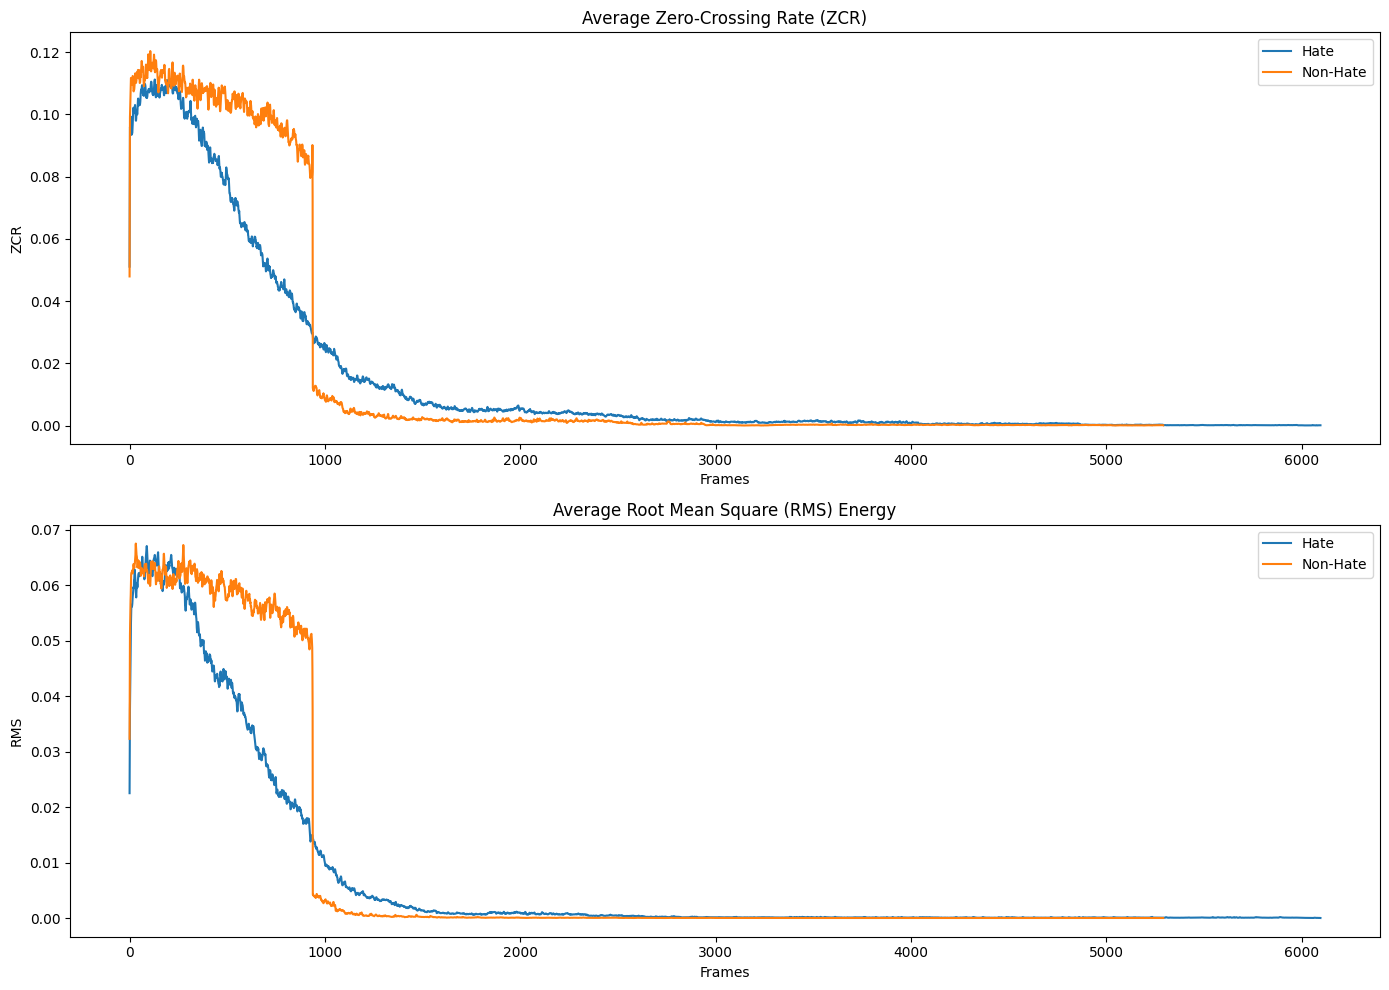

In [9]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Directories containing the mono audio files
hate_audio_dir = "/kaggle/working/extracted_hate_mono"  # Update this path to your hate audio directory
non_hate_audio_dir = "/kaggle/working/extracted_non_hate_mono"  # Update this path to your non-hate audio directory

def calculate_zcr_rms(audio_dir):
    zcr_list = []
    rms_list = []
    
    # List all files in the directory
    all_files = os.listdir(audio_dir)
    print(f"Files in directory '{audio_dir}': {all_files}")
    
    # Filter for .wav files
    audio_files = [f for f in all_files if f.endswith('.wav')]
    
    print(f"Filtered audio files: {audio_files}")
    
    if not audio_files:
        print(f"No audio files found in directory: {audio_dir}")
        return [], []
    
    for audio_file in audio_files:
        audio_path = os.path.join(audio_dir, audio_file)
        
        # Load audio file
        try:
            y, sr = librosa.load(audio_path, sr=16000)
        except Exception as e:
            print(f"Error loading file {audio_path}: {e}")
            continue
        
        # Extract Zero-Crossing Rate (ZCR)
        zcr = librosa.feature.zero_crossing_rate(y)[0]
        zcr_list.append(zcr)
        
        # Extract Root Mean Square (RMS) energy
        rms = librosa.feature.rms(y=y)[0]
        rms_list.append(rms)
    
    if not zcr_list or not rms_list:
        print(f"No ZCR or RMS features extracted for directory: {audio_dir}")
        return [], []
    
    # Aggregate ZCR and RMS by padding/truncating to the same length
    max_len = max(map(len, zcr_list))
    zcr_list = [np.pad(zcr, (0, max_len - len(zcr)), 'constant') for zcr in zcr_list]
    rms_list = [np.pad(rms, (0, max_len - len(rms)), 'constant') for rms in rms_list]
    
    # Compute point-by-point averages
    avg_zcr = np.mean(zcr_list, axis=0)
    avg_rms = np.mean(rms_list, axis=0)
    
    return avg_zcr, avg_rms

# Calculate ZCR and RMS for hate and non-hate audio files
hate_avg_zcr, hate_avg_rms = calculate_zcr_rms(hate_audio_dir)
non_hate_avg_zcr, non_hate_avg_rms = calculate_zcr_rms(non_hate_audio_dir)

# Check if calculations were successful
if hate_avg_zcr.size == 0 or non_hate_avg_zcr.size == 0:
    print("Error: ZCR/RMS calculation failed for one or both directories.")
else:
    # Plot the average ZCR and RMS for hate and non-hate audio files
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 1, 1)
    plt.plot(hate_avg_zcr, label='Hate')
    plt.plot(non_hate_avg_zcr, label='Non-Hate')
    plt.title('Average Zero-Crossing Rate (ZCR)')
    plt.xlabel('Frames')
    plt.ylabel('ZCR')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(hate_avg_rms, label='Hate')
    plt.plot(non_hate_avg_rms, label='Non-Hate')
    plt.title('Average Root Mean Square (RMS) Energy')
    plt.xlabel('Frames')
    plt.ylabel('RMS')
    plt.legend()

    # Save the plot
    plt.tight_layout()
    plt.savefig("/kaggle/working/average_zcr_rms_plot.png")
    plt.show()
